<a href="https://colab.research.google.com/github/augustoaccorsi/autoscaling/blob/main/rnn_lstm_gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [481]:
#pip install tensorflow==1.14 https://www.kaggle.com/raoulma/ny-stock-price-prediction-rnn-lstm-gru

In [482]:
#pip install tensorflow-gpu==1.14

In [483]:
'''
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

#import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow.python.framework import ops

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 
'''

'\nimport numpy as np\nimport pandas as pd\nimport math\nimport sklearn\nimport sklearn.preprocessing\nimport datetime\nimport os\nimport matplotlib.pyplot as plt\nimport tensorflow as tf\n\n#import tensorflow.compat.v1 as tf\ntf.disable_v2_behavior()\n\nfrom tensorflow.python.framework import ops\n\n# split data in 80%/10%/10% train/validation/test sets\nvalid_set_size_percentage = 10 \ntest_set_size_percentage = 10 \n'

In [484]:
'''
data_xls = pd.read_excel('/content/cpu.xlsx', 'Sheet1', dtype=str, index_col=None)
data_xls.to_csv('/content/csvfile.csv', encoding='utf-8', index=False) 
df=pd.read_csv('/content/csvfile.csv', index_col='date',parse_dates=True)

df=df.dropna()
print('Shape of data',df.shape)
#df.head()
df.tail()
'''

"\ndata_xls = pd.read_excel('/content/cpu.xlsx', 'Sheet1', dtype=str, index_col=None)\ndata_xls.to_csv('/content/csvfile.csv', encoding='utf-8', index=False) \ndf=pd.read_csv('/content/csvfile.csv', index_col='date',parse_dates=True)\n\ndf=df.dropna()\nprint('Shape of data',df.shape)\n#df.head()\ndf.tail()\n"

In [485]:
#df.describe()

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   263 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [487]:

'''
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df, color='red', label='open')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');
'''

"\nplt.figure(figsize=(15, 5));\nplt.subplot(1,2,1);\nplt.plot(df, color='red', label='open')\nplt.title('stock price')\nplt.xlabel('time [days]')\nplt.ylabel('price')\nplt.legend(loc='best')\n#plt.show()\n\nplt.subplot(1,2,2);\nplt.plot(df, color='black', label='volume')\nplt.title('stock volume')\nplt.xlabel('time [days]')\nplt.ylabel('volume')\nplt.legend(loc='best');\n"

In [488]:
# function for min-max normalization of stock
'''
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['value'] = min_max_scaler.fit_transform(df.value.values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

# choose one stock
df_stock = df

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)
'''

"\ndef normalize_data(df):\n    min_max_scaler = sklearn.preprocessing.MinMaxScaler()\n    df['value'] = min_max_scaler.fit_transform(df.value.values.reshape(-1,1))\n    return df\n\n# function to create train, validation, test data given stock data and sequence length\ndef load_data(stock, seq_len):\n    data_raw = stock.to_numpy() # convert to numpy array\n    data = []\n    \n    # create all possible sequences of length seq_len\n    for index in range(len(data_raw) - seq_len): \n        data.append(data_raw[index: index + seq_len])\n    \n    data = np.array(data);\n    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  \n    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));\n    train_set_size = data.shape[0] - (valid_set_size + test_set_size);\n    \n    x_train = data[:train_set_size,:-1,:]\n    y_train = data[:train_set_size,-1,:]\n    \n    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]\n    y_valid = data

In [489]:
'''
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.value.values, color='red', label='actual')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()
'''

"\nplt.figure(figsize=(15, 5));\nplt.plot(df_stock_norm.value.values, color='red', label='actual')\n#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')\nplt.title('stock')\nplt.xlabel('time [days]')\nplt.ylabel('normalized price/volume')\nplt.legend(loc='best')\nplt.show()\n"

In [490]:
## Basic Cell RNN in tensorflow
'''
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 1
n_neurons = 200 
n_outputs = 1
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 200 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

ops.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use Basic LSTM Cell 
#layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})
'''

"\nindex_in_epoch = 0;\nperm_array  = np.arange(x_train.shape[0])\nnp.random.shuffle(perm_array)\n\n# function to get the next batch\ndef get_next_batch(batch_size):\n    global index_in_epoch, x_train, perm_array   \n    start = index_in_epoch\n    index_in_epoch += batch_size\n    \n    if index_in_epoch > x_train.shape[0]:\n        np.random.shuffle(perm_array) # shuffle permutation array\n        start = 0 # start next epoch\n        index_in_epoch = batch_size\n        \n    end = index_in_epoch\n    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]\n\n# parameters\nn_steps = seq_len-1 \nn_inputs = 1\nn_neurons = 200 \nn_outputs = 1\nn_layers = 2\nlearning_rate = 0.001\nbatch_size = 50\nn_epochs = 200 \ntrain_set_size = x_train.shape[0]\ntest_set_size = x_test.shape[0]\n\nops.reset_default_graph()\n\nX = tf.placeholder(tf.float32, [None, n_steps, n_inputs])\ny = tf.placeholder(tf.float32, [None, n_outputs])\n\n# use Basic RNN Cell\nlayers = [tf.contrib.rnn.Basi

In [491]:
#y_train.shape

In [492]:
'''
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(25, 10));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');


corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))
'''

"\nft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest\n\n## show predictions\nplt.figure(figsize=(25, 10));\nplt.subplot(1,2,1);\n\nplt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')\n\nplt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],\n         color='gray', label='valid target')\n\nplt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],\n                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),\n         y_test[:,ft], color='black', label='test target')\n\nplt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',\n         label='train prediction')\n\nplt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),\n         y_valid_pred[:,ft], color='orange', label='valid prediction')\n\nplt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],\n                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),\n         y_test_pre

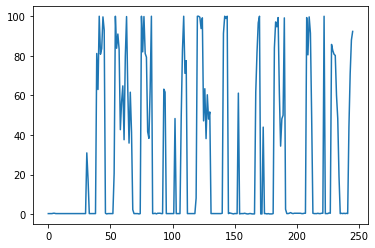

In [493]:
#https://medium.com/analytics-vidhya/rnn-vs-gru-vs-lstm-863b0b7b1573
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN
from sklearn.preprocessing import MinMaxScaler



data_xls = pd.read_excel('/content/cpuup.xlsx', 'Sheet1', dtype=str, index_col=None)
data_xls.to_csv('/content/csvfile.csv', encoding='utf-8', index=False) 
df=pd.read_csv('/content/csvfile.csv')


df.head()
df.drop(['date'],axis=1,inplace=True)
dataset = np.array(df)
dataset.reshape(-1,1)


plt.plot(dataset)

In [494]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [495]:
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train=dataset[:train_size,:]
test=dataset[train_size:len(dataset),:]
def getdata(data,lookback):
    X,Y=[],[]
    for i in range(len(data)-lookback-1):
        X.append(data[i:i+lookback,0])
        Y.append(data[i+lookback,0])
    return np.array(X),np.array(Y).reshape(-1,1)
lookback=1
X_train,y_train=getdata(train,lookback)
X_test,y_test=getdata(test,lookback)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [496]:
#LSMT
model=Sequential()
model.add(LSTM(5,input_shape=(1,lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [497]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 5)                 140       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [498]:
model.fit(X_train, y_train, epochs=50, batch_size=1)
y_pred=model.predict(X_test)
y_test=scaler.inverse_transform(y_test)
y_pred=scaler.inverse_transform(y_pred)

Epoch 1/50
182/182 [==============================] - 3s 16ms/sample - loss: 0.1731
Epoch 2/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.1284
Epoch 3/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.1098
Epoch 4/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.0974
Epoch 5/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.0870
Epoch 6/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.0795
Epoch 7/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.0753
Epoch 8/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.0731
Epoch 9/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.0721
Epoch 10/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.0716
Epoch 11/50
182/182 [==============================] - 0s 3ms/sample - loss: 0.0718
Epoch 12/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.0714


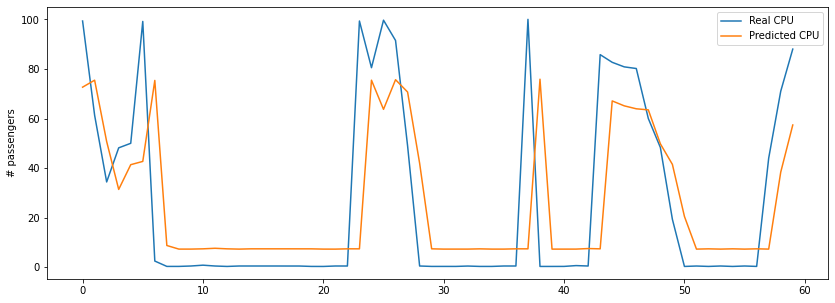

In [499]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real CPU')
plt.plot(y_pred, label = 'Predicted CPU')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [500]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

print(f'MAE {mean_absolute_error(y_test, y_pred)}')
print(f'MSE {mean_squared_error(y_test, y_pred)}')
print(f'RMSE {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2 {r2_score(y_test, y_pred)}')

MAE 18.373772251815794
MSE 822.042123183959
RMSE 28.671276971630668
R2 0.4022703496397009


In [501]:
model.evaluate(X_train, y_train)

182/182 [==============================] - 1s 5ms/sample - loss: 0.0701


0.07014396172630918